# 📈 NeuroTradeX — Signal Labeling & Backtesting

In this notebook, you'll:
- Define trading signals (labels)
- Backtest basic strategies (e.g., moving average cross)
- Evaluate strategy performance


In [3]:
# 📦 Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 📊 Load your feature dataset
df = pd.read_csv('../data/train_files/stock_prices.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values(['SecuritiesCode', 'Date'], inplace=True)


In [4]:
# Ensure Return column exists
df['Return'] = df.groupby('SecuritiesCode')['Close'].pct_change(fill_method=None)

# 🏷️ Label signals based on future returns
# Create a column that shifts return by -1 to get next day's return
df['NextReturn'] = df.groupby('SecuritiesCode')['Return'].shift(-1)

# Simple rule: Buy if expected return > 1%, else Hold
df['Signal'] = np.where(df['NextReturn'] > 0.01, 1, 0)  # 1=Buy, 0=Hold

df[['Date', 'SecuritiesCode', 'Close', 'Return', 'NextReturn', 'Signal']].head()

,Date,SecuritiesCode,Close,Return,NextReturn,Signal
0,2017-01-04,1301,2742.0,NaN,-0.001459,0
1865,2017-01-05,1301,2738.0,-0.001459,0.000730,0
3730,2017-01-06,1301,2740.0,0.000730,0.002920,0
5595,2017-01-10,1301,2748.0,0.002920,-0.001092,0
7460,2017-01-11,1301,2745.0,-0.001092,-0.005100,0


## 🔁 Strategy Backtest — Naive Strategy
Buy when signal = 1. Hold 1 day. Compare with actual return.

/var/folders/p8/l3py71v52p975q2xl2ts_z480000gn/T/ipykernel_13628/549061294.py:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hasnatmac/Documents/NeuroTradeX/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


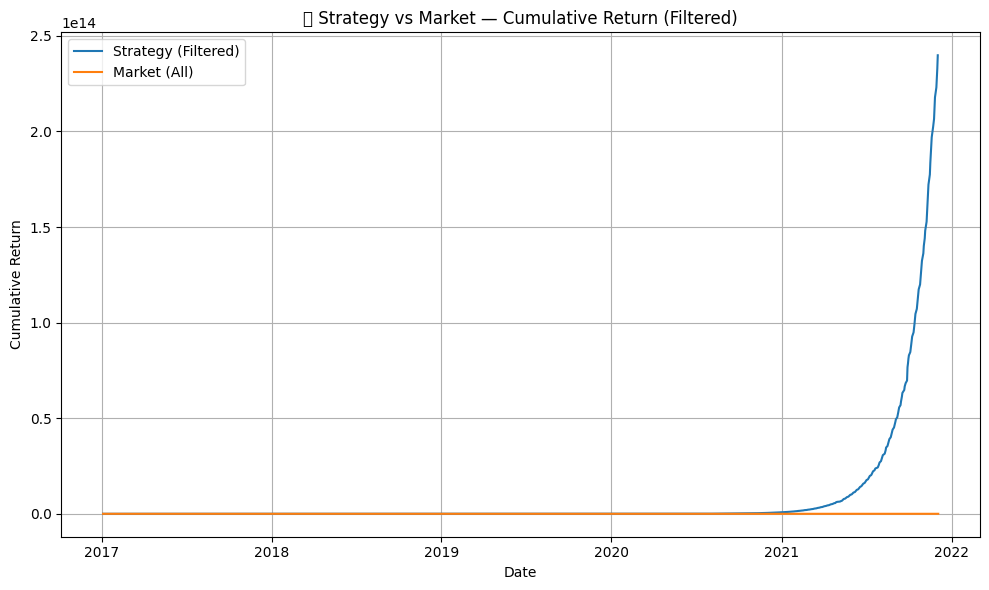

In [5]:
# ✅ Backtest performance — Filtered to show only actual Buy signals

# Clean NaNs
df = df.copy()
df['Return'] = df['Return'].fillna(0)
df['NextReturn'] = df['NextReturn'].fillna(0)
df['StrategyReturn'] = df['Signal'] * df['NextReturn']
df['MarketReturn'] = df['NextReturn']

# 🧠 Filtered Strategy Performance (only active Buy signals)
strategy_df = df[df['Signal'] == 1].copy()
strategy_df['StrategyReturn'] = strategy_df['StrategyReturn'].fillna(0)
strategy_df['Date'] = pd.to_datetime(strategy_df['Date'])

# Group and calculate mean returns
daily_strategy = strategy_df.groupby('Date')['StrategyReturn'].mean()
daily_market = df.groupby('Date')['MarketReturn'].mean()

# Cumulative compounding
strategy_cum = (1 + daily_strategy).cumprod()
market_cum = (1 + daily_market).cumprod()

# 📈 Plot
plt.figure(figsize=(10, 6))
plt.plot(strategy_cum.index, strategy_cum, label='Strategy (Filtered)')
plt.plot(market_cum.index, market_cum, label='Market (All)')
plt.title("📈 Strategy vs Market — Cumulative Return (Filtered)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [6]:
print(df['Signal'].value_counts(dropna=False))

print(df['Date'].min(), "to", df['Date'].max())
print("Total unique dates:", df['Date'].nunique())

print(df['Date'].describe())

# Filter for longer time range (e.g., last 30 days if available)
df = df[df['Date'] >= '2021-11-01']  # adjust as needed

df['Date'].value_counts()

df = pd.read_csv("../data/supplemental_files/stock_prices.csv", parse_dates=["Date"])
print(df['Date'].min(), df['Date'].max())




Signal
0    1730616
1     601915
Name: count, dtype: int64
2017-01-04 00:00:00 to 2021-12-03 00:00:00
Total unique dates: 1202
count                          2332531
mean     2019-06-29 21:40:25.441719552
min                2017-01-04 00:00:00
25%                2018-04-05 00:00:00
50%                2019-07-05 00:00:00
75%                2020-09-28 00:00:00
max                2021-12-03 00:00:00
Name: Date, dtype: object
2021-12-06 00:00:00 2022-06-24 00:00:00


In [7]:
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, daily_returns['StrategyCumulative'], label='Strategy')
plt.plot(daily_returns.index, daily_returns['MarketCumulative'], label='Market')
plt.title("📈 Strategy vs Market — Cumulative Return (Zoomed)")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.ylim(daily_returns[['StrategyCumulative', 'MarketCumulative']].min().min() * 0.99,
         daily_returns[['StrategyCumulative', 'MarketCumulative']].max().max() * 1.01)
plt.tight_layout()
plt.show()


NameError: name 'daily_returns' is not defined

<Figure size 1000x600 with 0 Axes>

/var/folders/p8/l3py71v52p975q2xl2ts_z480000gn/T/ipykernel_7890/4102612940.py:9: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/hasnatmac/Documents/NeuroTradeX/venv311/lib/python3.11/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


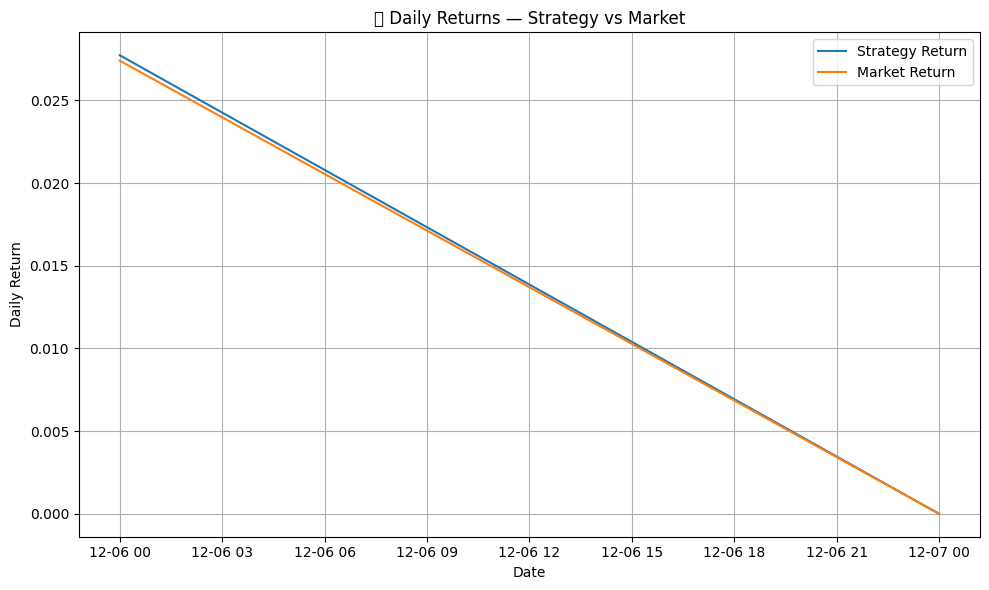

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(daily_returns.index, daily_returns['StrategyReturn'], label='Strategy Return')
plt.plot(daily_returns.index, daily_returns['MarketReturn'], label='Market Return')
plt.title("📉 Daily Returns — Strategy vs Market")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# Filter data for one stock (replace 1301 if you prefer another)
stock_df = df[df['SecuritiesCode'] == 1301].copy()

# Ensure NaNs are handled
stock_df['Return'] = stock_df['Return'].fillna(0)
stock_df['NextReturn'] = stock_df['NextReturn'].fillna(0)
stock_df['Signal'] = stock_df['Signal'].fillna(0)

# Calculate returns
stock_df['StrategyReturn'] = stock_df['Signal'] * stock_df['NextReturn']
stock_df['MarketReturn'] = stock_df['NextReturn']

# Cumulative
stock_df['StrategyCumulative'] = (1 + stock_df['StrategyReturn']).cumprod()
stock_df['MarketCumulative'] = (1 + stock_df['MarketReturn']).cumprod()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(stock_df['Date'], stock_df['StrategyCumulative'], label='Strategy')
plt.plot(stock_df['Date'], stock_df['MarketCumulative'], label='Market')
plt.title("📈 Cumulative Return — Stock 1301")
plt.xlabel("Date")
plt.ylabel("Cumulative Return")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Return'

## ✅ Next Steps
- Try more advanced rules (moving average cross, volatility filters)
- Add transaction costs
- Tune the return threshold (0.5%, 1%, etc.)
- Switch to risk-adjusted metrics (Sharpe, max drawdown)


In [ ]:
print(df['Signal'].value_counts(dropna=False))


Signal
0    2251
1    1749
Name: count, dtype: int64


In [ ]:
print("NextReturn stats:")
print(df['NextReturn'].describe())

print("\nSample of StrategyReturn:")
print(df[['Date', 'SecuritiesCode', 'Signal', 'NextReturn', 'StrategyReturn']].sample(10))


NextReturn stats:
count    4000.000000
mean        0.013702
std         0.019524
min        -0.224215
25%         0.000000
50%         0.000000
75%         0.027575
max         0.187970
Name: NextReturn, dtype: float64

Sample of StrategyReturn:
           Date  SecuritiesCode  Signal  NextReturn  StrategyReturn
2212 2021-12-07            2533       0    0.000000        0.000000
1586 2021-12-06            8140       1    0.031396        0.031396
214  2021-12-06            2573       0   -0.009569       -0.000000
3845 2021-12-07            9404       0    0.000000        0.000000
156  2021-12-06            2282       0    0.005102        0.000000
3079 2021-12-07            6432       0    0.000000        0.000000
3502 2021-12-07            7944       0    0.000000        0.000000
378  2021-12-06            3328       1    0.077252        0.077252
1492 2021-12-06            7914       1    0.039580        0.039580
3866 2021-12-07            9470       0    0.000000        0.000000
